In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import json
import random
from itertools import chain
from collections import Counter
from plotly.subplots import make_subplots
import matplotlib
from IPython.core.display import display,HTML,Javascript
import IPython.display
import plotly.express as px
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

In [2]:
public = pd.read_csv("survey_results_public.csv")
public = public[(public['Employment']=='Employed full-time') | (public['Employment']=='Independent contractor, freelancer, or self-employed')]
public = public.dropna(subset=['ConvertedSalary'])
public_data_df = public[['Country','FormalEducation','OpenSource','DevType','YearsCodingProf','LanguageWorkedWith','ConvertedSalary','HopeFiveYears','JobSatisfaction']]
public_data_df.loc[(public_data_df.Country=='Hong Kong (S.A.R.)'),'Country'] = 'China'

In [3]:
public_data_df.head()

,Country,FormalEducation,OpenSource,DevType,YearsCodingProf,LanguageWorkedWith,ConvertedSalary,HopeFiveYears,JobSatisfaction
1,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Database administrator;DevOps specialist;Full-...,18-20 years,JavaScript;Python;Bash/Shell,70841.0,Working in a different or more specialized tec...,Moderately dissatisfied
4,South Africa,Some college/university study without earning ...,No,Data or business analyst;Desktop or enterprise...,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,21426.0,Working in a different or more specialized tec...,Slightly satisfied
5,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",No,Back-end developer;Database administrator;Fron...,3-5 years,Java;JavaScript;Python;TypeScript;HTML;CSS,41671.0,Working in a different or more specialized tec...,Moderately satisfied
6,United States,Some college/university study without earning ...,Yes,Back-end developer;Front-end developer;Full-st...,0-2 years,JavaScript;HTML;CSS,120000.0,Working as a founder or co-founder of my own c...,Slightly satisfied
8,United States,Some college/university study without earning ...,Yes,"Back-end developer;C-suite executive (CEO, CTO...",21-23 years,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,250000.0,Doing the same work,Moderately satisfied


In [4]:
public_data_df.to_csv("public_data_clean.csv")

In [5]:
public_df = pd.read_csv("public_data_clean.csv")

In [6]:
NA_df = public_df[(public_df['Country'] == 'United States')|(public_df['Country'] == 'Canada')]
India_df = public_df[public_df['Country'] == 'India']
China_df = public_df[(public_df['Country'] == 'China')|(public_df['Country'] == 'Hong Kong (S.A.R.)')]

Europe_countries_df = pd.read_csv("listofeucountries_csv.csv").rename(columns={"x": "EuropeCountryName"})
Europe_countries_set = set(Europe_countries_df['EuropeCountryName'].unique())
Europe_df = public_df[public_df['Country'] == public_df['Country'].map(lambda x: x if x in Europe_countries_set else None)]

## Map

In [175]:
import plotly.express as px
gapminder = px.data.gapminder().query("year == 2007")
fig = px.line_geo(gapminder, locations="iso_alpha",
                  color="continent", # "continent" is one of the columns of gapminder
                  projection="orthographic")
fig.show()

In [179]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [184]:
public_df.head()

,Unnamed: 0,Country,FormalEducation,OpenSource,DevType,YearsCodingProf,LanguageWorkedWith,ConvertedSalary,HopeFiveYears,JobSatisfaction
0,1,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Database administrator;DevOps specialist;Full-...,18-20 years,JavaScript;Python;Bash/Shell,70841.0,Working in a different or more specialized tec...,Moderately dissatisfied
1,4,South Africa,Some college/university study without earning ...,No,Data or business analyst;Desktop or enterprise...,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,21426.0,Working in a different or more specialized tec...,Slightly satisfied
2,5,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",No,Back-end developer;Database administrator;Fron...,3-5 years,Java;JavaScript;Python;TypeScript;HTML;CSS,41671.0,Working in a different or more specialized tec...,Moderately satisfied
3,6,United States,Some college/university study without earning ...,Yes,Back-end developer;Front-end developer;Full-st...,0-2 years,JavaScript;HTML;CSS,120000.0,Working as a founder or co-founder of my own c...,Slightly satisfied
4,8,United States,Some college/university study without earning ...,Yes,"Back-end developer;C-suite executive (CEO, CTO...",21-23 years,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,250000.0,Doing the same work,Moderately satisfied


In [267]:
Language_salary_df = public_df[['Country','LanguageWorkedWith','ConvertedSalary']].dropna()
def helper(x):
    return len(x.split(";"))
Language_salary_df['LanguageCount'] = Language_salary_df.apply(lambda x: helper(x['LanguageWorkedWith']),axis=1)
def helper_area(x):
    if x == "China" or x == 'Hong Kong (S.A.R.)':
        return "China"
    if x == "India":
        return "India"
    if x == "United States" or x == "Canada":
        return "North America"
    if x in Europe_countries_set:
        return "Europe"
    else:
        return None
Language_salary_df['Area'] = Language_salary_df.apply(lambda x: helper_area(x['Country']),axis=1)
Language_salary_df.dropna(inplace = True)
# Language_salary_df
Language_salary_df = Language_salary_df.loc[:,['Country','ConvertedSalary','LanguageCount','Area']]
Language_salary_df = Language_salary_df.groupby(['Country','LanguageCount'],as_index=False).median()
Language_salary_df['Area'] = Language_salary_df.apply(lambda x: helper_area(x['Country']),axis=1)
# Language_salary_df.head()
gapminder = px.data.gapminder().query("year == 2007")
Language_salary_map = Language_salary_df.copy()
Language_salary_map = Language_salary_map.merge(gapminder[['iso_alpha','country']],left_on='Country',right_on='country',how='left').drop('country',axis=1)
# Language_salary_map.head()
def hepler_count(x):
    if x>=1 and x<6:
        return '1 to 5 languages'
    if x>=6 and x<10:
        return '6 to 9'
    if x>=10 and x<20:
        return '10 to 19'
    else:
        return '20 or more'
Language_salary_map['Programming Language Counts'] = Language_salary_map.apply(lambda x : hepler_count(x['LanguageCount']),axis=1)
# Language_salary_map.head()
fig = px.scatter_geo(Language_salary_map, locations="iso_alpha", color="Area",
                     hover_name="Country", size="ConvertedSalary",
                     animation_frame='Programming Language Counts',
                     projection="natural earth")
fig.show()
# pio.write_html(fig, file='test.html')

## Country/Devtype/Salary Level

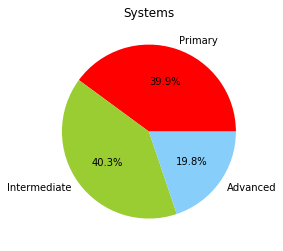

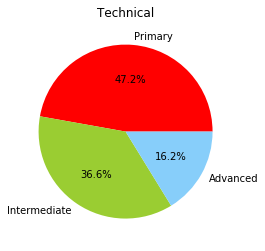

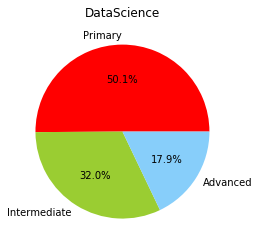

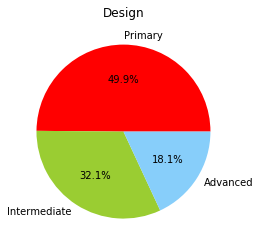

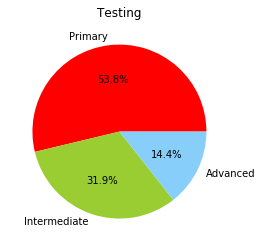

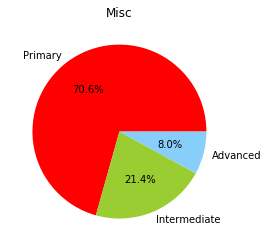

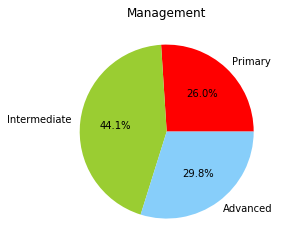

In [151]:
public_data = public_df.drop('DevType', axis=1).join(public_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
public_data['Type']=None
public_data.loc[(public_data.DevType=='Back-end developer')|(public_data.DevType=='Full-stack developer')|(public_data.DevType=='Front-end developer')|(public_data.DevType=='Mobile developer')|(public_data.DevType=='Desktop or enterprise applications developer')|(public_data.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
public_data.loc[(public_data.DevType=='Database administrator')|(public_data.DevType=='DevOps specialist')|(public_data.DevType=='System administrator'),'Type'] = 'Systems'
public_data.loc[(public_data.DevType=='Game or graphics developer')|(public_data.DevType=='Designer'),'Type'] = 'Design'
public_data.loc[(public_data.DevType=='Student')|(public_data.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
public_data.loc[(public_data.DevType=='Data scientist or machine learning specialist')|(public_data.DevType=='Data or business analyst'),'Type'] = 'DataScience'
public_data.loc[(public_data.DevType=='QA or test developer'),'Type'] = 'Testing'
public_data.loc[(public_data.DevType=='Marketing or sales professional')|(public_data.DevType=='C-suite executive (CEO, CTO, etc.)')|(public_data.DevType=='Product manager')|(public_data.DevType=='Engineering manager'),'Type'] = 'Management'
# public_data

public_data = public_data.dropna(subset=['YearsCodingProf','Type'])
# public_data['YearsCodingProf'].value_counts()
public_data.loc[(public_data.YearsCodingProf=='0-2 years')|(public_data.YearsCodingProf=='3-5 years'),'Level'] = 'Primary'
public_data.loc[(public_data.YearsCodingProf=='6-8 years')|(public_data.YearsCodingProf=='9-11 years')|(public_data.YearsCodingProf=='12-14 years'),'Level'] = 'Intermediate'
public_data['Level'].fillna('Advanced',inplace=True)
dic_level={}
for i in public_data.Type.unique():
    labels=[]
    data=public_data[public_data['Type']==i]
    for j in ['Primary','Intermediate','Advanced']:
        data_level=data[data['Level']==j]
        labels.append(len(data_level))
    dic_level[i]=labels
# print(dic_level)
colors = ['red','yellowgreen','lightskyblue']
labels=['Primary','Intermediate','Advanced']
for i in dic_level.keys():
    plt.pie(dic_level[i],labels=labels,colors=colors, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

### India

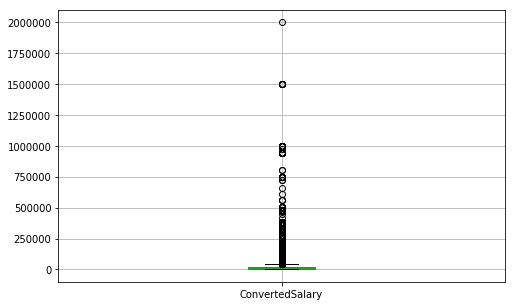

count     4940.000000
mean     11187.892713
std       4534.350851
min       5448.000000
25%       7358.000000
50%      10113.000000
75%      14480.000000
max      21916.000000
Name: ConvertedSalary, dtype: float64


In [152]:
India_data = public_data[public_data['Country']=='India']
India_data_DevType = India_data
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
India_data_DevType.boxplot(column = 'ConvertedSalary', ax = ax)
plt.show()
s = India_data_DevType['ConvertedSalary']
India_data_DevType_copy= India_data_DevType.copy()
India_data_DevType_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
India_data_DevType = India_data_DevType_copy[India_data_DevType_copy['isOutlier'] != True]
print(India_data_DevType['ConvertedSalary'].describe())

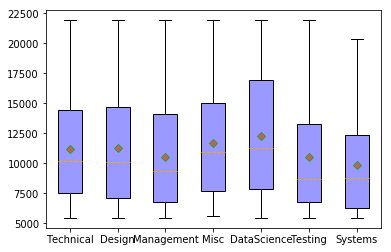

In [153]:
India_data_DevType['SalaryType']=None
India_data_DevType.loc[India_data_DevType.ConvertedSalary<7400,'SalaryType'] = 'Low'
India_data_DevType.loc[India_data_DevType.ConvertedSalary>13000,'SalaryType'] = 'High'
India_data_DevType.loc[(India_data_DevType.ConvertedSalary<=13000) & (India_data_DevType.ConvertedSalary>7400),'SalaryType'] = 'Medium'
India =India_data_DevType.groupby(['Type','SalaryType'],as_index=False).count()
India['Country']='India'

count={}
for i in India.Type.unique():
    count[i]=sum(India.loc[India['Type']==i,'OpenSource'])

for i in India.Type.unique():
    India.loc[India.Type==i,'OpenSource'] = count[i]
    
India['Type']='IND'+India['Type']
India['SalaryType']=India['Type']+'_'+India['SalaryType']
Types = []
devtypes = India_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(India_data_DevType.loc[India_data_DevType.Type==devtype,'ConvertedSalary'])

# plot
plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})
plt.show()

### China

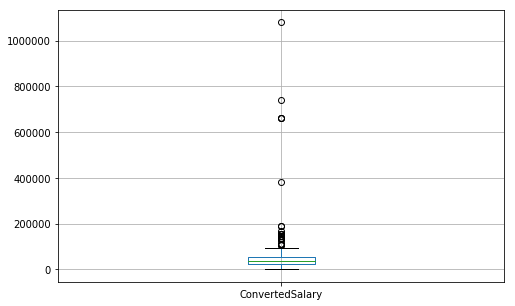

count      419.000000
mean     35951.644391
std       9253.794137
min      22440.000000
25%      27636.000000
50%      36842.000000
75%      46056.000000
max      54542.000000
Name: ConvertedSalary, dtype: float64


In [154]:
China_data = public_data[public_data['Country']=='China']
China_data_DevType = China_data

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
China_data_DevType.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

s = China_data_DevType['ConvertedSalary']
China_data_DevType_copy=China_data_DevType.copy()
China_data_DevType_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
China_data_DevType = China_data_DevType_copy[China_data_DevType_copy['isOutlier'] != True]
print(China_data_DevType['ConvertedSalary'].describe())

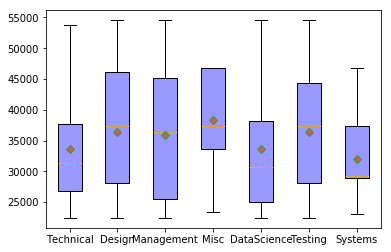

In [155]:
China_data_DevType['SalaryType']=None
China_data_DevType.loc[China_data_DevType.ConvertedSalary<=27000,'SalaryType'] = 'Low'
China_data_DevType.loc[China_data_DevType.ConvertedSalary>=40000,'SalaryType'] = 'High'
China_data_DevType.loc[(China_data_DevType.ConvertedSalary>27000) & (China_data_DevType.ConvertedSalary<40000),'SalaryType'] = 'Medium'
China =China_data_DevType.groupby(['Type','SalaryType'],as_index=False).count()
China['Country']='China'
count={}
for i in China.Type.unique():
    count[i]=sum(China.loc[China['Type']==i,'OpenSource'])

for i in China.Type.unique():
    China.loc[China.Type==i,'OpenSource'] = count[i]
    
China['Type']='CHN'+China['Type']
China['SalaryType']=China['Type']+'_'+China['SalaryType']
# China
Types = []
devtypes = China_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(China_data_DevType.loc[China_data_DevType.Type==devtype,'ConvertedSalary'])

plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.show()

### USA/Canada

42087


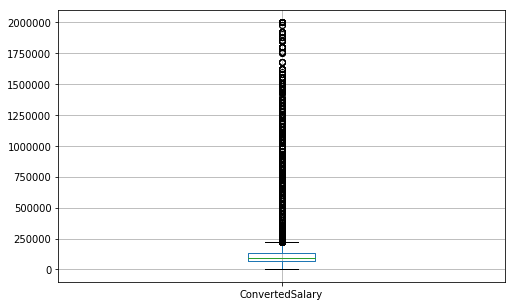

count     21834.000000
mean      97424.508748
std       17930.494743
min       69500.000000
25%       80521.000000
50%       96624.000000
75%      112000.000000
max      130000.000000
Name: ConvertedSalary, dtype: float64


In [156]:
NorthAmerica_data = public_data[(public_data['Country']=='United States') | (public_data['Country']=='Canada')]
print(len(NorthAmerica_data))
NorthAmerica_data_DevType = NorthAmerica_data
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
NorthAmerica_data_DevType.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

s=NorthAmerica_data_DevType['ConvertedSalary']
# print(s.describe())
NorthAmerica_data_DevType_copy=NorthAmerica_data_DevType.copy()
NorthAmerica_data_DevType_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
NorthAmerica_data_DevType = NorthAmerica_data_DevType_copy[NorthAmerica_data_DevType_copy['isOutlier'] != True]
print(NorthAmerica_data_DevType['ConvertedSalary'].describe())

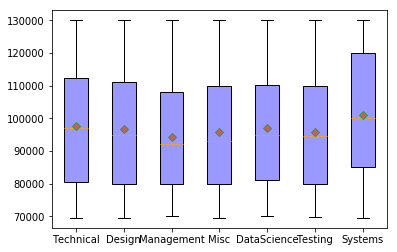

In [157]:
NorthAmerica_data_DevType['SalaryType']=None
NorthAmerica_data_DevType.loc[NorthAmerica_data_DevType.ConvertedSalary<=75000,'SalaryType'] = 'Low'
NorthAmerica_data_DevType.loc[NorthAmerica_data_DevType.ConvertedSalary>=100000,'SalaryType'] = 'High'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.ConvertedSalary>75000) & (NorthAmerica_data_DevType.ConvertedSalary<100000),'SalaryType'] = 'Medium'

NorthAmerica = NorthAmerica_data_DevType.groupby(['Type','SalaryType'],as_index=False).count()
NorthAmerica['Country']='NorthAmerica'

count={}
for i in NorthAmerica.Type.unique():
    count[i]=sum(NorthAmerica.loc[NorthAmerica['Type']==i,'OpenSource'])

for i in NorthAmerica.Type.unique():
    NorthAmerica.loc[NorthAmerica.Type==i,'OpenSource'] = count[i]

NorthAmerica['Type']='NA'+NorthAmerica['Type']
NorthAmerica['SalaryType']=NorthAmerica['Type']+'_'+NorthAmerica['SalaryType']
# NorthAmerica

Types = []
devtypes = NorthAmerica_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(NorthAmerica_data_DevType.loc[NorthAmerica_data_DevType.Type==devtype,'ConvertedSalary'])

plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.show()

### Europe

77593


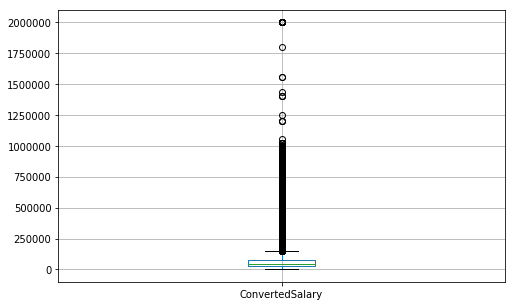

count    39080.000000
mean     47682.155067
std      13856.959991
min      24324.000000
25%      36000.000000
50%      47227.000000
75%      58752.000000
max      73433.000000
Name: ConvertedSalary, dtype: float64


In [158]:
Europe_data = public_data[(public_data['Country']!='China') & (public_data['Country']!='India')&(public_data['Country']!='Canada')&(public_data['Country']!='United States')]
print(len(Europe_data))
Europe_data_DevType = Europe_data

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
Europe_data_DevType.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

s=Europe_data_DevType['ConvertedSalary']
# print(s.describe())
Europe_data_DevType_copy=Europe_data_DevType.copy()
Europe_data_DevType_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
Europe_data_DevType = Europe_data_DevType_copy[Europe_data_DevType_copy['isOutlier'] != True]
print(Europe_data_DevType['ConvertedSalary'].describe())

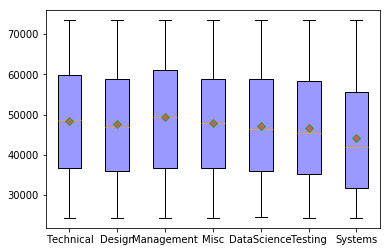

In [159]:
Europe_data_DevType['SalaryType'] = None
Europe_data_DevType.loc[Europe_data_DevType.ConvertedSalary<=36000,'SalaryType'] = 'Low'
Europe_data_DevType.loc[Europe_data_DevType.ConvertedSalary>=50000,'SalaryType'] = 'High'
Europe_data_DevType.loc[(Europe_data_DevType.ConvertedSalary>36000) & (Europe_data_DevType.ConvertedSalary<50000),'SalaryType'] = 'Medium'

Europe = Europe_data_DevType.groupby(['Type','SalaryType'],as_index=False).count()
Europe['Country']='Europe'

count={}
for i in Europe.Type.unique():
    count[i]=sum(Europe.loc[Europe['Type']==i,'OpenSource'])

for i in Europe.Type.unique():
    Europe.loc[Europe.Type==i,'OpenSource'] = count[i]

Europe['Type']='EUR'+Europe['Type']
Europe['SalaryType']=Europe['Type']+'_'+Europe['SalaryType']
# Europe

Types = []
devtypes = Europe_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(Europe_data_DevType.loc[Europe_data_DevType.Type==devtype,'ConvertedSalary'])

plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.show()

In [160]:
df = pd.concat([India, China,NorthAmerica,Europe])

df.drop('Unnamed: 0',inplace=True,axis=1)
df.dtypes

Type                  object
SalaryType            object
Country               object
FormalEducation        int64
OpenSource             int64
YearsCodingProf        int64
LanguageWorkedWith     int64
ConvertedSalary        int64
HopeFiveYears          int64
JobSatisfaction        int64
DevType                int64
Level                  int64
isOutlier              int64
dtype: object

In [161]:
color_data=[]
for i in range(117):
    color_data.append(random.random())

levels = ['SalaryType', 'Type', 'Country'] # levels used for the hierarchical chart
color_columns = ['FormalEducation', 'OpenSource']
value_column = 'FormalEducation'

def build_hierarchical_dataframe(df, levels, value_column, color_columns=None):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy, 
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
        dfg = df.groupby(levels[i:]).sum(numerical_only=True)
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = 'total'
        df_tree['value'] = dfg[value_column]
        df_tree['color'] = dfg[color_columns[0]] / dfg[color_columns[1]]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id='total', parent='', 
                              value=df[value_column].sum(),
                              color=df[color_columns[0]].sum() / df[color_columns[1]].sum()))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees


df_all_trees = build_hierarchical_dataframe(df, levels, value_column, color_columns)
average_score = df['FormalEducation'].sum() / df['OpenSource'].sum()

df_all_trees

df_all_trees['color']=color_data

fig = make_subplots(1, 2, specs=[[{"type": "domain"},{"type": "domain"}]],)
    
fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> Records: %{value}<br> Proportion: %{color:.2f}',
    name=''
    ), 1, 1)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> Records: %{value}<br> Proportion: %{color:.2f}',
    maxdepth=2
    ), 1, 2)

fig.update_layout(margin=dict(t=10, b=10, r=10, l=10))
fig.show()

In [163]:
d = '''
{
     'branchvalues': 'total',
     'domain': {'x': [0.0, 0.45], 'y': [0.0, 1.0]},
     'hovertemplate': '<b>%{label} </b> <br> Records: %{value}<br> Proportion: %{color:.2f}',
     'labels': array(['CHNDataScience_High', 'CHNDataScience_Low', 'CHNDataScience_Medium',
                      'CHNDesign_High', 'CHNDesign_Low', 'CHNDesign_Medium',
                      'CHNManagement_High', 'CHNManagement_Low', 'CHNManagement_Medium',
                      'CHNMisc_High', 'CHNMisc_Low', 'CHNMisc_Medium', 'CHNSystems_High',
                      'CHNSystems_Low', 'CHNSystems_Medium', 'CHNTechnical_High',
                      'CHNTechnical_Low', 'CHNTechnical_Medium', 'CHNTesting_High',
                      'CHNTesting_Low', 'CHNTesting_Medium', 'EURDataScience_High',
                      'EURDataScience_Low', 'EURDataScience_Medium', 'EURDesign_High',
                      'EURDesign_Low', 'EURDesign_Medium', 'EURManagement_High',
                      'EURManagement_Low', 'EURManagement_Medium', 'EURMisc_High',
                      'EURMisc_Low', 'EURMisc_Medium', 'EURSystems_High', 'EURSystems_Low',
                      'EURSystems_Medium', 'EURTechnical_High', 'EURTechnical_Low',
                      'EURTechnical_Medium', 'EURTesting_High', 'EURTesting_Low',
                      'EURTesting_Medium', 'INDDataScience_High', 'INDDataScience_Low',
                      'INDDataScience_Medium', 'INDDesign_High', 'INDDesign_Low',
                      'INDDesign_Medium', 'INDManagement_High', 'INDManagement_Low',
                      'INDManagement_Medium', 'INDMisc_High', 'INDMisc_Low', 'INDMisc_Medium',
                      'INDSystems_High', 'INDSystems_Low', 'INDSystems_Medium',
                      'INDTechnical_High', 'INDTechnical_Low', 'INDTechnical_Medium',
                      'INDTesting_High', 'INDTesting_Low', 'INDTesting_Medium',
                      'NADataScience_High', 'NADataScience_Low', 'NADataScience_Medium',
                      'NADesign_High', 'NADesign_Low', 'NADesign_Medium', 'NAManagement_High',
                      'NAManagement_Low', 'NAManagement_Medium', 'NAMisc_High', 'NAMisc_Low',
                      'NAMisc_Medium', 'NASystems_High', 'NASystems_Low', 'NASystems_Medium',
                      'NATechnical_High', 'NATechnical_Low', 'NATechnical_Medium',
                      'NATesting_High', 'NATesting_Low', 'NATesting_Medium', 'CHNDataScience',
                      'CHNDesign', 'CHNManagement', 'CHNMisc', 'CHNSystems', 'CHNTechnical',
                      'CHNTesting', 'EURDataScience', 'EURDesign', 'EURManagement', 'EURMisc',
                      'EURSystems', 'EURTechnical', 'EURTesting', 'INDDataScience',
                      'INDDesign', 'INDManagement', 'INDMisc', 'INDSystems', 'INDTechnical',
                      'INDTesting', 'NADataScience', 'NADesign', 'NAManagement', 'NAMisc',
                      'NASystems', 'NATechnical', 'NATesting', 'China', 'Europe', 'India',
                      'NorthAmerica', 'total'], dtype=object),
     'marker': {'cmid': 0.3287512762864716,
                'colors': array([0.02772555, 0.29003376, 0.15484959, 0.93211856, 0.4094749 , 0.621689  ,
                                 0.99741149, 0.43610688, 0.14046139, 0.7060924 , 0.54814496, 0.16210769,
                                 0.3033148 , 0.88444393, 0.55453438, 0.39566227, 0.430743  , 0.63569033,
                                 0.94718815, 0.84146658, 0.94167268, 0.27094655, 0.50023384, 0.5538514 ,
                                 0.59592088, 0.0738398 , 0.21481167, 0.82818298, 0.68300797, 0.58742197,
                                 0.05443495, 0.87092965, 0.10502963, 0.61748902, 0.55976806, 0.62112385,
                                 0.18493529, 0.54967868, 0.95249596, 0.95896467, 0.49365944, 0.30112882,
                                 0.74285697, 0.24130978, 0.0779665 , 0.15927025, 0.33160864, 0.32276278,
                                 0.67992843, 0.33802526, 0.14348885, 0.31604942, 0.21981612, 0.06372865,
                                 0.67464388, 0.41542766, 0.28028888, 0.26498409, 0.69521904, 0.49134894,
                                 0.71733888, 0.17235745, 0.62603821, 0.00911345, 0.9749353 , 0.10278966,
                                 0.60404703, 0.54088924, 0.7608468 , 0.30350573, 0.93066199, 0.17272336,
                                 0.55742803, 0.74532669, 0.42591692, 0.06582953, 0.997115  , 0.97002006,
                                 0.40833193, 0.81709247, 0.76993686, 0.9398012 , 0.89883495, 0.34337947,
                                 0.74360742, 0.37567899, 0.12559196, 0.10392266, 0.391211  , 0.55932769,
                                 0.74195996, 0.17812677, 0.73644264, 0.31036793, 0.42072618, 0.81001591,
                                 0.50943567, 0.74261665, 0.42550388, 0.02628447, 0.9005165 , 0.11209533,
                                 0.83621982, 0.99173129, 0.49570885, 0.37913023, 0.84546691, 0.12108084,
                                 0.15810375, 0.41731166, 0.7666289 , 0.65000059, 0.33099707, 0.30828974,
                                 0.25007023, 0.02034804, 0.62600715]),
                'colorscale': [[0.0, 'rgb(103,0,31)'], [0.1, 'rgb(178,24,43)'],
                               [0.2, 'rgb(214,96,77)'], [0.3, 'rgb(244,165,130)'],
                               [0.4, 'rgb(253,219,199)'], [0.5, 'rgb(247,247,247)'],
                               [0.6, 'rgb(209,229,240)'], [0.7, 'rgb(146,197,222)'],
                               [0.8, 'rgb(67,147,195)'], [0.9, 'rgb(33,102,172)'],
                               [1.0, 'rgb(5,48,97)']]},
     'name': '',
     'parents': array(['CHNDataScience', 'CHNDataScience', 'CHNDataScience', 'CHNDesign',
                       'CHNDesign', 'CHNDesign', 'CHNManagement', 'CHNManagement',
                       'CHNManagement', 'CHNMisc', 'CHNMisc', 'CHNMisc', 'CHNSystems',
                       'CHNSystems', 'CHNSystems', 'CHNTechnical', 'CHNTechnical',
                       'CHNTechnical', 'CHNTesting', 'CHNTesting', 'CHNTesting',
                       'EURDataScience', 'EURDataScience', 'EURDataScience', 'EURDesign',
                       'EURDesign', 'EURDesign', 'EURManagement', 'EURManagement',
                       'EURManagement', 'EURMisc', 'EURMisc', 'EURMisc', 'EURSystems',
                       'EURSystems', 'EURSystems', 'EURTechnical', 'EURTechnical',
                       'EURTechnical', 'EURTesting', 'EURTesting', 'EURTesting',
                       'INDDataScience', 'INDDataScience', 'INDDataScience', 'INDDesign',
                       'INDDesign', 'INDDesign', 'INDManagement', 'INDManagement',
                       'INDManagement', 'INDMisc', 'INDMisc', 'INDMisc', 'INDSystems',
                       'INDSystems', 'INDSystems', 'INDTechnical', 'INDTechnical',
                       'INDTechnical', 'INDTesting', 'INDTesting', 'INDTesting',
                       'NADataScience', 'NADataScience', 'NADataScience', 'NADesign',
                       'NADesign', 'NADesign', 'NAManagement', 'NAManagement', 'NAManagement',
                       'NAMisc', 'NAMisc', 'NAMisc', 'NASystems', 'NASystems', 'NASystems',
                       'NATechnical', 'NATechnical', 'NATechnical', 'NATesting', 'NATesting',
                       'NATesting', 'China', 'China', 'China', 'China', 'China', 'China',
                       'China', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
                       'Europe', 'India', 'India', 'India', 'India', 'India', 'India', 'India',
                       'NorthAmerica', 'NorthAmerica', 'NorthAmerica', 'NorthAmerica',
                       'NorthAmerica', 'NorthAmerica', 'NorthAmerica', 'total', 'total',
                       'total', 'total', ''], dtype=object),
     'values': array([7, 8, 17, 5, 9, 9, 8, 2, 9, 1, 2, 6, 18, 12, 25, 91, 50, 124, 5, 4, 3,
                      877, 482, 628, 659, 446, 570, 866, 397, 499, 302, 306, 280, 2396, 1229,
                      1636, 11151, 6516, 8257, 385, 239, 305, 81, 44, 95, 70, 69, 95, 76, 33,
                      68, 20, 34, 37, 152, 110, 170, 1190, 849, 1518, 30, 32, 40, 559, 206,
                      512, 404, 175, 427, 585, 125, 320, 138, 43, 113, 1350, 449, 1182, 6912,
                      2069, 5504, 245, 123, 267, 32, 23, 19, 9, 55, 265, 12, 1987, 1675, 1762,
                      888, 5261, 25924, 929, 220, 234, 177, 91, 432, 3557, 102, 1277, 1006,
                      1030, 294, 2981, 14485, 635, 415, 38426, 4813, 21708, 65362],
                     dtype=object)
 }), Sunburst({
     'branchvalues': 'total',
     'domain': {'x': [0.55, 1.0], 'y': [0.0, 1.0]},
     'hovertemplate': '<b>%{label} </b> <br> Records: %{value}<br> Proportion: %{color:.2f}',
     'labels': array(['CHNDataScience_High', 'CHNDataScience_Low', 'CHNDataScience_Medium',
                      'CHNDesign_High', 'CHNDesign_Low', 'CHNDesign_Medium',
                      'CHNManagement_High', 'CHNManagement_Low', 'CHNManagement_Medium',
                      'CHNMisc_High', 'CHNMisc_Low', 'CHNMisc_Medium', 'CHNSystems_High',
                      'CHNSystems_Low', 'CHNSystems_Medium', 'CHNTechnical_High',
                      'CHNTechnical_Low', 'CHNTechnical_Medium', 'CHNTesting_High',
                      'CHNTesting_Low', 'CHNTesting_Medium', 'EURDataScience_High',
                      'EURDataScience_Low', 'EURDataScience_Medium', 'EURDesign_High',
                      'EURDesign_Low', 'EURDesign_Medium', 'EURManagement_High',
                      'EURManagement_Low', 'EURManagement_Medium', 'EURMisc_High',
                      'EURMisc_Low', 'EURMisc_Medium', 'EURSystems_High', 'EURSystems_Low',
                      'EURSystems_Medium', 'EURTechnical_High', 'EURTechnical_Low',
                      'EURTechnical_Medium', 'EURTesting_High', 'EURTesting_Low',
                      'EURTesting_Medium', 'INDDataScience_High', 'INDDataScience_Low',
                      'INDDataScience_Medium', 'INDDesign_High', 'INDDesign_Low',
                      'INDDesign_Medium', 'INDManagement_High', 'INDManagement_Low',
                      'INDManagement_Medium', 'INDMisc_High', 'INDMisc_Low', 'INDMisc_Medium',
                      'INDSystems_High', 'INDSystems_Low', 'INDSystems_Medium',
                      'INDTechnical_High', 'INDTechnical_Low', 'INDTechnical_Medium',
                      'INDTesting_High', 'INDTesting_Low', 'INDTesting_Medium',
                      'NADataScience_High', 'NADataScience_Low', 'NADataScience_Medium',
                      'NADesign_High', 'NADesign_Low', 'NADesign_Medium', 'NAManagement_High',
                      'NAManagement_Low', 'NAManagement_Medium', 'NAMisc_High', 'NAMisc_Low',
                      'NAMisc_Medium', 'NASystems_High', 'NASystems_Low', 'NASystems_Medium',
                      'NATechnical_High', 'NATechnical_Low', 'NATechnical_Medium',
                      'NATesting_High', 'NATesting_Low', 'NATesting_Medium', 'CHNDataScience',
                      'CHNDesign', 'CHNManagement', 'CHNMisc', 'CHNSystems', 'CHNTechnical',
                      'CHNTesting', 'EURDataScience', 'EURDesign', 'EURManagement', 'EURMisc',
                      'EURSystems', 'EURTechnical', 'EURTesting', 'INDDataScience',
                      'INDDesign', 'INDManagement', 'INDMisc', 'INDSystems', 'INDTechnical',
                      'INDTesting', 'NADataScience', 'NADesign', 'NAManagement', 'NAMisc',
                      'NASystems', 'NATechnical', 'NATesting', 'China', 'Europe', 'India',
                      'NorthAmerica', 'total'], dtype=object),
     'marker': {'cmid': 0.3287512762864716,
                'colors': array([0.02772555, 0.29003376, 0.15484959, 0.93211856, 0.4094749 , 0.621689  ,
                                 0.99741149, 0.43610688, 0.14046139, 0.7060924 , 0.54814496, 0.16210769,
                                 0.3033148 , 0.88444393, 0.55453438, 0.39566227, 0.430743  , 0.63569033,
                                 0.94718815, 0.84146658, 0.94167268, 0.27094655, 0.50023384, 0.5538514 ,
                                 0.59592088, 0.0738398 , 0.21481167, 0.82818298, 0.68300797, 0.58742197,
                                 0.05443495, 0.87092965, 0.10502963, 0.61748902, 0.55976806, 0.62112385,
                                 0.18493529, 0.54967868, 0.95249596, 0.95896467, 0.49365944, 0.30112882,
                                 0.74285697, 0.24130978, 0.0779665 , 0.15927025, 0.33160864, 0.32276278,
                                 0.67992843, 0.33802526, 0.14348885, 0.31604942, 0.21981612, 0.06372865,
                                 0.67464388, 0.41542766, 0.28028888, 0.26498409, 0.69521904, 0.49134894,
                                 0.71733888, 0.17235745, 0.62603821, 0.00911345, 0.9749353 , 0.10278966,
                                 0.60404703, 0.54088924, 0.7608468 , 0.30350573, 0.93066199, 0.17272336,
                                 0.55742803, 0.74532669, 0.42591692, 0.06582953, 0.997115  , 0.97002006,
                                 0.40833193, 0.81709247, 0.76993686, 0.9398012 , 0.89883495, 0.34337947,
                                 0.74360742, 0.37567899, 0.12559196, 0.10392266, 0.391211  , 0.55932769,
                                 0.74195996, 0.17812677, 0.73644264, 0.31036793, 0.42072618, 0.81001591,
                                 0.50943567, 0.74261665, 0.42550388, 0.02628447, 0.9005165 , 0.11209533,
                                 0.83621982, 0.99173129, 0.49570885, 0.37913023, 0.84546691, 0.12108084,
                                 0.15810375, 0.41731166, 0.7666289 , 0.65000059, 0.33099707, 0.30828974,
                                 0.25007023, 0.02034804, 0.62600715]),
                'colorscale': [[0.0, 'rgb(103,0,31)'], [0.1, 'rgb(178,24,43)'],
                               [0.2, 'rgb(214,96,77)'], [0.3, 'rgb(244,165,130)'],
                               [0.4, 'rgb(253,219,199)'], [0.5, 'rgb(247,247,247)'],
                               [0.6, 'rgb(209,229,240)'], [0.7, 'rgb(146,197,222)'],
                               [0.8, 'rgb(67,147,195)'], [0.9, 'rgb(33,102,172)'],
                               [1.0, 'rgb(5,48,97)']]},
     'maxdepth': 2,
     'parents': array(['CHNDataScience', 'CHNDataScience', 'CHNDataScience', 'CHNDesign',
                       'CHNDesign', 'CHNDesign', 'CHNManagement', 'CHNManagement',
                       'CHNManagement', 'CHNMisc', 'CHNMisc', 'CHNMisc', 'CHNSystems',
                       'CHNSystems', 'CHNSystems', 'CHNTechnical', 'CHNTechnical',
                       'CHNTechnical', 'CHNTesting', 'CHNTesting', 'CHNTesting',
                       'EURDataScience', 'EURDataScience', 'EURDataScience', 'EURDesign',
                       'EURDesign', 'EURDesign', 'EURManagement', 'EURManagement',
                       'EURManagement', 'EURMisc', 'EURMisc', 'EURMisc', 'EURSystems',
                       'EURSystems', 'EURSystems', 'EURTechnical', 'EURTechnical',
                       'EURTechnical', 'EURTesting', 'EURTesting', 'EURTesting',
                       'INDDataScience', 'INDDataScience', 'INDDataScience', 'INDDesign',
                       'INDDesign', 'INDDesign', 'INDManagement', 'INDManagement',
                       'INDManagement', 'INDMisc', 'INDMisc', 'INDMisc', 'INDSystems',
                       'INDSystems', 'INDSystems', 'INDTechnical', 'INDTechnical',
                       'INDTechnical', 'INDTesting', 'INDTesting', 'INDTesting',
                       'NADataScience', 'NADataScience', 'NADataScience', 'NADesign',
                       'NADesign', 'NADesign', 'NAManagement', 'NAManagement', 'NAManagement',
                       'NAMisc', 'NAMisc', 'NAMisc', 'NASystems', 'NASystems', 'NASystems',
                       'NATechnical', 'NATechnical', 'NATechnical', 'NATesting', 'NATesting',
                       'NATesting', 'China', 'China', 'China', 'China', 'China', 'China',
                       'China', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
                       'Europe', 'India', 'India', 'India', 'India', 'India', 'India', 'India',
                       'NorthAmerica', 'NorthAmerica', 'NorthAmerica', 'NorthAmerica',
                       'NorthAmerica', 'NorthAmerica', 'NorthAmerica', 'total', 'total',
                       'total', 'total', ''], dtype=object),
     'values': array([7, 8, 17, 5, 9, 9, 8, 2, 9, 1, 2, 6, 18, 12, 25, 91, 50, 124, 5, 4, 3,
                      877, 482, 628, 659, 446, 570, 866, 397, 499, 302, 306, 280, 2396, 1229,
                      1636, 11151, 6516, 8257, 385, 239, 305, 81, 44, 95, 70, 69, 95, 76, 33,
                      68, 20, 34, 37, 152, 110, 170, 1190, 849, 1518, 30, 32, 40, 559, 206,
                      512, 404, 175, 427, 585, 125, 320, 138, 43, 113, 1350, 449, 1182, 6912,
                      2069, 5504, 245, 123, 267, 32, 23, 19, 9, 55, 265, 12, 1987, 1675, 1762,
                      888, 5261, 25924, 929, 220, 234, 177, 91, 432, 3557, 102, 1277, 1006,
                      1030, 294, 2981, 14485, 635, 415, 38426, 4813, 21708, 65362],
                     dtype=object)
 }
'''
with open("Sunburst.json","w") as w:
    json.dump(d, w)

# ALL

## DevType/Salary level/Hope for 5 years

In [130]:
sankey_df = public_df[['DevType','ConvertedSalary','HopeFiveYears']]
sankey_df = sankey_df.drop('DevType', axis=1).join(sankey_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

sankey_df['Type'] = None
sankey_df.loc[(sankey_df.DevType=='Back-end developer')|(sankey_df.DevType=='Full-stack developer')|(sankey_df.DevType=='Front-end developer')|(sankey_df.DevType=='Mobile developer')|(sankey_df.DevType=='Desktop or enterprise applications developer')|(sankey_df.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
sankey_df.loc[(sankey_df.DevType=='Database administrator')|(sankey_df.DevType=='DevOps specialist')|(sankey_df.DevType=='System administrator'),'Type'] = 'Systems'
sankey_df.loc[(sankey_df.DevType=='Game or graphics developer')|(sankey_df.DevType=='Designer'),'Type'] = 'Design'
sankey_df.loc[(sankey_df.DevType=='Student')|(sankey_df.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
sankey_df.loc[(sankey_df.DevType=='Data scientist or machine learning specialist')|(sankey_df.DevType=='Data or business analyst'),'Type'] = 'DataScience'
sankey_df.loc[(sankey_df.DevType=='QA or test developer'),'Type'] = 'Testing'
sankey_df.loc[(sankey_df.DevType=='Marketing or sales professional')|(sankey_df.DevType=='C-suite executive (CEO, CTO, etc.)')|(sankey_df.DevType=='Product manager')|(sankey_df.DevType=='Engineering manager'),'Type'] = 'Management'

sankey_df_copy = sankey_df.copy()
sankey_df_copy.loc[:, 'isOutlier'] = (sankey_df['ConvertedSalary'] < sankey_df['ConvertedSalary'].quantile(0.25))|(sankey_df['ConvertedSalary'] > sankey_df['ConvertedSalary'].quantile(0.75))
sankey_df = sankey_df_copy[sankey_df_copy['isOutlier'] != True]
# sankey_df['ConvertedSalary'].describe()

percent_75 = sankey_df['ConvertedSalary'].describe()['75%']
percent_50 = sankey_df['ConvertedSalary'].describe()['50%']
percent_25 = sankey_df['ConvertedSalary'].describe()['25%']
percent_100 = sankey_df['ConvertedSalary'].describe()['max']
max_ = (percent_50+percent_75)/2

sankey_df['SalaryType'] = None
sankey_df.loc[sankey_df.ConvertedSalary <= percent_25,'SalaryType'] = 'Low'
sankey_df.loc[sankey_df.ConvertedSalary >= max_,'SalaryType'] = 'High'
sankey_df.loc[(sankey_df.ConvertedSalary < max_) & (sankey_df.ConvertedSalary > percent_25),'SalaryType'] = 'Medium'

devT_salT_df = sankey_df.groupby(["Type",'SalaryType'], as_index=False).count()[['Type', 'SalaryType', 'DevType']].rename(columns={'Type': 'Type', 'SalaryType': 'SalaryType', 'DevType':'counts'})
type_name_list = devT_salT_df['Type'].unique()
type_name_map = {}
cnt = 0
for i in type_name_list:
    type_name_map[i] = cnt
    cnt += 1
# print(type_name_map)
salaryT_name_list = devT_salT_df['SalaryType'].unique()
salaryT_name_map = {}
for i in salaryT_name_list:
    salaryT_name_map[i] = cnt
    cnt += 1
# print(salaryT_name_map)
label = list(chain(type_name_list,salaryT_name_list))
# print(label)
devT_salT_df['Type_label'] = devT_salT_df['Type'].map(lambda x: type_name_map[x])
devT_salT_df['salaryT_label'] = devT_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
# print(devT_salT_df)

# DevType VS. Salary level
node_colors = ['rgba(210,200,140,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)','rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)']
link_colors = ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',]
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "white", width = 0),
      label = label,
      color = node_colors
    ),
    link = dict(
      source = devT_salT_df['Type_label'],
      target = devT_salT_df['salaryT_label'],
      value = devT_salT_df['counts'],
#       color = [node_colors[i][:-2]+'0.5)' for i in devT_salT_df['Type_label']]
      color = link_colors

    ))])

fig.update_layout(title_text="Job types vs. Salary types", font_size=10)
fig.show()

sankey_df.dropna(inplace=True)
def helper(x, y):
    if x == "Working in a different or more specialized technical role than the one I'm in now":
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Technical':
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y != 'Technical' and y != 'Management':
        return "Not technical and not manager (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Management':
        return "Manager (hope in 5 years)"
    if x == 'Working as a product manager or project manager' or x == 'Working as an engineering manager or other functional manager':
        return "Manager (hope in 5 years)"
    if x == 'Working in a career completely unrelated to software development' or x == 'Retirement':
        return "Not technical and not manager (hope in 5 years)"
sankey_df['Hopes'] = sankey_df.apply(lambda x: helper(x['HopeFiveYears'], x['Type']), axis=1)
# sankey_df['Hopes'].value_counts()
hopes_salT_df = sankey_df.groupby(["Hopes",'SalaryType'], as_index=False).count()[['Hopes', 'SalaryType', 'DevType']].rename(columns={'Hopes': 'Hopes', 'SalaryType': 'SalaryType', 'DevType':'counts'})
# hopes_salT_df
hopes_salT_df['salaryT_label'] = hopes_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
hopes_name_map = {}
for i in hopes_salT_df['Hopes'].unique():
    hopes_name_map[i] = cnt
    cnt += 1
hopes_salT_df['hopes_label'] = hopes_salT_df['Hopes'].map(lambda x: hopes_name_map[x])
label = list(chain(label, hopes_salT_df['Hopes'].unique()))

# DevType/Salary level/Hope for 5 years
node_colors = ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)']
link_colors = ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)']
fig = go.Figure(
    data=[go.Sankey(
#         orientation = "v",
    node = dict(
    
      pad = 15,
      thickness = 20,
      line = dict(color = "#FFFFFF", width = 0),
      label = label,
      color = node_colors+['rgba(75,0,130,0.5)','rgba(242,116,32,0.5)','rgba(100,227,212,0.5)']
    ),
    link = dict(
      source = list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values)),
      target = list(chain(devT_salT_df['salaryT_label'].values, hopes_salT_df['hopes_label'].values)),
      value = list(chain(devT_salT_df['counts'].values,hopes_salT_df['counts'].values)),
#       color = [node_colors[i][:-2]+'0.5)' for i in list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values))]
      color = link_colors
    ))])

fig.update_layout(title_text="Job types vs. Salary types vs. hope job types", font_size=10)
fig.show()

In [132]:
d = '''
{
    type:'sankey',
    orientation:'h',
    'link': {'color': ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)'],
              'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                         6, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9],
              'target': [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
                         8, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
              'value': [1399, 819, 1371, 1047, 816, 1218, 1255, 675, 1079, 343,
                        514, 523, 3494, 2178, 3550, 15771, 11016, 16530, 679, 432,
                        737, 4441, 2757, 4068, 2482, 1401, 2292, 11269, 7888, 12427]},
     'node': {'color': ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)'],
              'label': ['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)'],
              'line': {'color': '#FFFFFF', 'width': 0},
              'pad': 15,
              'thickness': 20}
 }
'''
with open("DevType_SalaryLevel_Hope_all.json","w") as w:
    json.dump(d, w)

## DevType/Salary/Years

In [172]:
data = pd.read_csv("public_data_clean.csv")
data2 = data.copy()
data2.YearsCodingProf =  data2.YearsCodingProf.fillna("0-2 years")
data2 = data2.dropna()
data2.DevType.astype(str)
data2=data2.drop('DevType', axis=1).join(data2['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
data2['Type']=None
data2.loc[(data2.DevType=='Back-end developer')|(data2.DevType=='Full-stack developer')|(data2.DevType=='Front-end developer')|(data2.DevType=='Mobile developer')|(data2.DevType=='Desktop or enterprise applications developer')|(data2.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
data2.loc[(data2.DevType=='Database administrator')|(data2.DevType=='DevOps specialist')|(data2.DevType=='System administrator'),'Type'] = 'Systems'
data2.loc[(data2.DevType=='Game or graphics developer')|(data2.DevType=='Designer'),'Type'] = 'Design'
data2.loc[(data2.DevType=='Student')|(data2.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
data2.loc[(data2.DevType=='Data scientist or machine learning specialist')|(data2.DevType=='Data or business analyst'),'Type'] = 'DataScience'
data2.loc[(data2.DevType=='QA or test developer'),'Type'] = 'Testing'
data2.loc[(data2.DevType=='Marketing or sales professional')|(data2.DevType=='C-suite executive (CEO, CTO, etc.)')|(data2.DevType=='Product manager')|(data2.DevType=='Engineering manager'),'Type'] = 'Management'


technical = data2[data2["Type"]=="Technical"]
management = data2[data2["Type"]=="Management"]

ymap = {'18-20 years': 6,
 '3-5 years': 1,
 '0-2 years': 0,
 '21-23 years': 7,
 '6-8 years': 2,
 '9-11 years': 3,
 '12-14 years': 4,
 '15-17 years': 5,
 '24-26 years': 8,
 '27-29 years': 9,
 '30 or more years': 10}

years = list(ymap.keys())
years.sort(key=lambda x:ymap[x])

def trend_go(data,name):
    DevType = data.groupby('DevType')
    
    type_year_salary = {}
    for j_type, year_salary in DevType:
        year_salary_groups = year_salary.groupby('YearsCodingProf').median()
#         print(year_salary_groups)
        type_year_salary[j_type] = [list(year_salary_groups.index.values), list(year_salary_groups['ConvertedSalary'].values)]
    for j_type in type_year_salary:
        temp = [[year, s] for year, s in zip(type_year_salary[j_type][0],type_year_salary[j_type][1])]
        temp.sort(key=lambda x:ymap[x[0]])
        type_year_salary[j_type] = [i[1] for i in temp]
    fig = go.Figure()
    for devtype, salaries in type_year_salary.items():
        fig.add_trace(go.Scatter(x=years, y=salaries,
                        mode='lines',
                        name=devtype))
    fig.show()
    print(fig.data)
    
trend_go(management,"Management")
trend_go(technical,"Technical")

(Scatter({
    'mode': 'lines',
    'name': 'C-suite executive (CEO, CTO, etc.)',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [18468.0, 38916.0, 56910.0, 76873.0, 83031.0, 83283.0, 111963.0,
          125000.0, 120782.0, 149577.0, 125000.0]
}), Scatter({
    'mode': 'lines',
    'name': 'Engineering manager',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [23741.0, 56566.5, 73548.0, 95000.0, 101582.0, 110000.0, 123785.5,
          140000.0, 137500.0, 135000.0, 133000.0]
}), Scatter({
    'mode': 'lines',
    'name': 'Marketing or sales professional',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [29376.0, 40300.0, 55

(Scatter({
    'mode': 'lines',
    'name': 'Back-end developer',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [30559.0, 46332.0, 61194.0, 73084.0, 83342.0, 90000.0, 97910.0, 102804.0,
          115000.0, 112000.0, 120000.0]
}), Scatter({
    'mode': 'lines',
    'name': 'Desktop or enterprise applications developer',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [31980.0, 47922.0, 56892.0, 67313.0, 75000.0, 80521.0, 95968.0, 97910.0,
          108000.0, 106738.5, 118366.0]
}), Scatter({
    'mode': 'lines',
    'name': 'Embedded applications or devices developer',
    'x': [0-2 years, 3-5 years, 6-8 years, 9-11 years, 12-14 years, 15-17 years,
          18-20 years, 21-23 years, 24-26 years, 27-29 years, 30 or more years],
    'y': [45283

# USA Canada

## DevType/Salary level/Hope for 5 years: USA Canada

In [134]:
sankey_df = NA_df[['DevType','ConvertedSalary','HopeFiveYears']]
sankey_df = sankey_df.drop('DevType', axis=1).join(sankey_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

sankey_df['Type'] = None
sankey_df.loc[(sankey_df.DevType=='Back-end developer')|(sankey_df.DevType=='Full-stack developer')|(sankey_df.DevType=='Front-end developer')|(sankey_df.DevType=='Mobile developer')|(sankey_df.DevType=='Desktop or enterprise applications developer')|(sankey_df.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
sankey_df.loc[(sankey_df.DevType=='Database administrator')|(sankey_df.DevType=='DevOps specialist')|(sankey_df.DevType=='System administrator'),'Type'] = 'Systems'
sankey_df.loc[(sankey_df.DevType=='Game or graphics developer')|(sankey_df.DevType=='Designer'),'Type'] = 'Design'
sankey_df.loc[(sankey_df.DevType=='Student')|(sankey_df.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
sankey_df.loc[(sankey_df.DevType=='Data scientist or machine learning specialist')|(sankey_df.DevType=='Data or business analyst'),'Type'] = 'DataScience'
sankey_df.loc[(sankey_df.DevType=='QA or test developer'),'Type'] = 'Testing'
sankey_df.loc[(sankey_df.DevType=='Marketing or sales professional')|(sankey_df.DevType=='C-suite executive (CEO, CTO, etc.)')|(sankey_df.DevType=='Product manager')|(sankey_df.DevType=='Engineering manager'),'Type'] = 'Management'

sankey_df_copy = sankey_df.copy()
sankey_df_copy.loc[:, 'isOutlier'] = (sankey_df['ConvertedSalary'] < sankey_df['ConvertedSalary'].quantile(0.25))|(sankey_df['ConvertedSalary'] > sankey_df['ConvertedSalary'].quantile(0.75))
sankey_df = sankey_df_copy[sankey_df_copy['isOutlier'] != True]
# sankey_df['ConvertedSalary'].describe()
percent_75 = sankey_df['ConvertedSalary'].describe()['75%']
percent_50 = sankey_df['ConvertedSalary'].describe()['50%']
percent_25 = sankey_df['ConvertedSalary'].describe()['25%']
percent_100 = sankey_df['ConvertedSalary'].describe()['max']
max_ = (percent_50+percent_75)/2
min_ = percent_25

# min_ = 75000
# max_ = 900000

sankey_df['SalaryType'] = None
sankey_df.loc[sankey_df.ConvertedSalary <= min_,'SalaryType'] = 'Low'
sankey_df.loc[sankey_df.ConvertedSalary >= max_,'SalaryType'] = 'High'
sankey_df.loc[(sankey_df.ConvertedSalary < max_) & (sankey_df.ConvertedSalary > min_),'SalaryType'] = 'Medium'

devT_salT_df = sankey_df.groupby(["Type",'SalaryType'], as_index=False).count()[['Type', 'SalaryType', 'DevType']].rename(columns={'Type': 'Type', 'SalaryType': 'SalaryType', 'DevType':'counts'})
type_name_list = devT_salT_df['Type'].unique()
type_name_map = {}
cnt = 0
for i in type_name_list:
    type_name_map[i] = cnt
    cnt += 1
# print(type_name_map)
salaryT_name_list = devT_salT_df['SalaryType'].unique()
salaryT_name_map = {}
for i in salaryT_name_list:
    salaryT_name_map[i] = cnt
    cnt += 1
# print(salaryT_name_map)
label = list(chain(type_name_list,salaryT_name_list))
# print(label)
devT_salT_df['Type_label'] = devT_salT_df['Type'].map(lambda x: type_name_map[x])
devT_salT_df['salaryT_label'] = devT_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])

# DevType VS. Salary level
node_colors = ['rgba(210,200,140,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)','rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',]
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "white", width = 0),
      label = label,
      color = node_colors
    ),
    link = dict(
      source = devT_salT_df['Type_label'],
      target = devT_salT_df['salaryT_label'],
      value = devT_salT_df['counts'],
#       color = [node_colors[i][:-2]+'0.5)' for i in devT_salT_df['Type_label']]
      color = link_colors

    ))])

fig.update_layout(title_text="Job types vs. Salary types", font_size=10)
fig.show()

sankey_df.dropna(inplace=True)
def helper(x, y):
    if x == "Working in a different or more specialized technical role than the one I'm in now":
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Technical':
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y != 'Technical' and y != 'Management':
        return "Not technical and not manager (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Management':
        return "Manager (hope in 5 years)"
    if x == 'Working as a product manager or project manager' or x == 'Working as an engineering manager or other functional manager':
        return "Manager (hope in 5 years)"
    if x == 'Working in a career completely unrelated to software development' or x == 'Retirement':
        return "Not technical and not manager (hope in 5 years)"
sankey_df['Hopes'] = sankey_df.apply(lambda x: helper(x['HopeFiveYears'], x['Type']), axis=1)
# sankey_df['Hopes'].value_counts()
hopes_salT_df = sankey_df.groupby(["Hopes",'SalaryType'], as_index=False).count()[['Hopes', 'SalaryType', 'DevType']].rename(columns={'Hopes': 'Hopes', 'SalaryType': 'SalaryType', 'DevType':'counts'})
# hopes_salT_df
hopes_salT_df['salaryT_label'] = hopes_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
hopes_name_map = {}
for i in hopes_salT_df['Hopes'].unique():
    hopes_name_map[i] = cnt
    cnt += 1
hopes_salT_df['hopes_label'] = hopes_salT_df['Hopes'].map(lambda x: hopes_name_map[x])
label = list(chain(label, hopes_salT_df['Hopes'].unique()))

# DevType/Salary level/Hope for 5 years
node_colors = ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)']
fig = go.Figure(
    data=[go.Sankey(
#         orientation = "v",
    node = dict(
    
      pad = 15,
      thickness = 20,
      line = dict(color = "#FFFFFF", width = 0),
      label = label,
      color = node_colors+['rgba(75,0,130,0.5)','rgba(242,116,32,0.5)','rgba(100,227,212,0.5)']
    ),
    link = dict(
      source = list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values)),
      target = list(chain(devT_salT_df['salaryT_label'].values, hopes_salT_df['hopes_label'].values)),
      value = list(chain(devT_salT_df['counts'].values,hopes_salT_df['counts'].values)),
#       color = [node_colors[i][:-2]+'0.5)' for i in list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values))]
      color = link_colors
    ))])

fig.update_layout(title_text="Job types vs. Salary types vs. hope job types", font_size=10)
fig.show()

In [137]:
d = '''
{
    type:'sankey',
    orientation:'h',
    'link': {'color': ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,1)', 'rgba(219,233,246,0.5)','rgba(219,233,246,0.5)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)'],
              'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                         6, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9],
              'target': [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
                         8, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
              'value': [442, 367, 478, 330, 290, 401, 484, 220, 339, 107, 74, 122,
                        1062, 829, 1106, 5593, 3699, 5307, 197, 205, 235, 1668,
                        1027, 1564, 949, 583, 968, 3570, 2804, 3836]},
     'node': {'color': ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)',
               'rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)'],
              'label': ['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)'],
              'line': {'color': '#FFFFFF', 'width': 0},
              'pad': 15,
              'thickness': 20}
 }
'''
with open("DevType_SalaryLevel_Hope_NA.json","w") as w:
    json.dump(d, w)

## DevType/Salary/Years: USA Canada

In [24]:
data2 = NA_df
data2.YearsCodingProf =  data2.YearsCodingProf.fillna("0-2 years")
data2 = data2.dropna()
data2.DevType.astype(str)
data2=data2.drop('DevType', axis=1).join(data2['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
data2['Type']=None
data2.loc[(data2.DevType=='Back-end developer')|(data2.DevType=='Full-stack developer')|(data2.DevType=='Front-end developer')|(data2.DevType=='Mobile developer')|(data2.DevType=='Desktop or enterprise applications developer')|(data2.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
data2.loc[(data2.DevType=='Database administrator')|(data2.DevType=='DevOps specialist')|(data2.DevType=='System administrator'),'Type'] = 'Systems'
data2.loc[(data2.DevType=='Game or graphics developer')|(data2.DevType=='Designer'),'Type'] = 'Design'
data2.loc[(data2.DevType=='Student')|(data2.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
data2.loc[(data2.DevType=='Data scientist or machine learning specialist')|(data2.DevType=='Data or business analyst'),'Type'] = 'DataScience'
data2.loc[(data2.DevType=='QA or test developer'),'Type'] = 'Testing'
data2.loc[(data2.DevType=='Marketing or sales professional')|(data2.DevType=='C-suite executive (CEO, CTO, etc.)')|(data2.DevType=='Product manager')|(data2.DevType=='Engineering manager'),'Type'] = 'Management'


technical = data2[data2["Type"]=="Technical"]
management = data2[data2["Type"]=="Management"]

ymap = {'18-20 years': 6,
 '3-5 years': 1,
 '0-2 years': 0,
 '21-23 years': 7,
 '6-8 years': 2,
 '9-11 years': 3,
 '12-14 years': 4,
 '15-17 years': 5,
 '24-26 years': 8,
 '27-29 years': 9,
 '30 or more years': 10}

years = list(ymap.keys())
years.sort(key=lambda x:ymap[x])

def trend_go(data,name):
    DevType = data.groupby('DevType')
    
    type_year_salary = {}
    for j_type, year_salary in DevType:
        year_salary_groups = year_salary.groupby('YearsCodingProf').median()
#         print(year_salary_groups)
        type_year_salary[j_type] = [list(year_salary_groups.index.values), list(year_salary_groups['ConvertedSalary'].values)]
    for j_type in type_year_salary:
        temp = [[year, s] for year, s in zip(type_year_salary[j_type][0],type_year_salary[j_type][1])]
        temp.sort(key=lambda x:ymap[x[0]])
        type_year_salary[j_type] = [i[1] for i in temp]
    fig = go.Figure()
    for devtype, salaries in type_year_salary.items():
        fig.add_trace(go.Scatter(x=years, y=salaries,
                        mode='lines',
                        name=devtype))
    fig.show()
    
trend_go(management,"Management")
trend_go(technical,"Technical")

# Europe

## DevType/Salary level/Hope for 5 years: Europe

In [138]:
sankey_df = Europe_df[['DevType','ConvertedSalary','HopeFiveYears']]
sankey_df = sankey_df.drop('DevType', axis=1).join(sankey_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

sankey_df['Type'] = None
sankey_df.loc[(sankey_df.DevType=='Back-end developer')|(sankey_df.DevType=='Full-stack developer')|(sankey_df.DevType=='Front-end developer')|(sankey_df.DevType=='Mobile developer')|(sankey_df.DevType=='Desktop or enterprise applications developer')|(sankey_df.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
sankey_df.loc[(sankey_df.DevType=='Database administrator')|(sankey_df.DevType=='DevOps specialist')|(sankey_df.DevType=='System administrator'),'Type'] = 'Systems'
sankey_df.loc[(sankey_df.DevType=='Game or graphics developer')|(sankey_df.DevType=='Designer'),'Type'] = 'Design'
sankey_df.loc[(sankey_df.DevType=='Student')|(sankey_df.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
sankey_df.loc[(sankey_df.DevType=='Data scientist or machine learning specialist')|(sankey_df.DevType=='Data or business analyst'),'Type'] = 'DataScience'
sankey_df.loc[(sankey_df.DevType=='QA or test developer'),'Type'] = 'Testing'
sankey_df.loc[(sankey_df.DevType=='Marketing or sales professional')|(sankey_df.DevType=='C-suite executive (CEO, CTO, etc.)')|(sankey_df.DevType=='Product manager')|(sankey_df.DevType=='Engineering manager'),'Type'] = 'Management'

sankey_df_copy = sankey_df.copy()
sankey_df_copy.loc[:, 'isOutlier'] = (sankey_df['ConvertedSalary'] < sankey_df['ConvertedSalary'].quantile(0.25))|(sankey_df['ConvertedSalary'] > sankey_df['ConvertedSalary'].quantile(0.75))
sankey_df = sankey_df_copy[sankey_df_copy['isOutlier'] != True]
# sankey_df['ConvertedSalary'].describe()
percent_75 = sankey_df['ConvertedSalary'].describe()['75%']
percent_50 = sankey_df['ConvertedSalary'].describe()['50%']
percent_25 = sankey_df['ConvertedSalary'].describe()['25%']
percent_100 = sankey_df['ConvertedSalary'].describe()['max']
# max_ = (percent_50+percent_75)/2

max_ = 58000
min_ = 40000

sankey_df['SalaryType'] = None
sankey_df.loc[sankey_df.ConvertedSalary <= min_,'SalaryType'] = 'Low'
sankey_df.loc[sankey_df.ConvertedSalary >= max_,'SalaryType'] = 'High'
sankey_df.loc[(sankey_df.ConvertedSalary < max_) & (sankey_df.ConvertedSalary > min_),'SalaryType'] = 'Medium'

devT_salT_df = sankey_df.groupby(["Type",'SalaryType'], as_index=False).count()[['Type', 'SalaryType', 'DevType']].rename(columns={'Type': 'Type', 'SalaryType': 'SalaryType', 'DevType':'counts'})
type_name_list = devT_salT_df['Type'].unique()
type_name_map = {}
cnt = 0
for i in type_name_list:
    type_name_map[i] = cnt
    cnt += 1
# print(type_name_map)
salaryT_name_list = devT_salT_df['SalaryType'].unique()
salaryT_name_map = {}
for i in salaryT_name_list:
    salaryT_name_map[i] = cnt
    cnt += 1
# print(salaryT_name_map)
label = list(chain(type_name_list,salaryT_name_list))
# print(label)

devT_salT_df['Type_label'] = devT_salT_df['Type'].map(lambda x: type_name_map[x])
devT_salT_df['salaryT_label'] = devT_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])

# DevType VS. Salary level
node_colors = ['rgba(210,200,140,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)','rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',]
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "white", width = 0),
      label = label,
      color = node_colors
    ),
    link = dict(
      source = devT_salT_df['Type_label'],
      target = devT_salT_df['salaryT_label'],
      value = devT_salT_df['counts'],
#       color = [node_colors[i][:-2]+'0.5)' for i in devT_salT_df['Type_label']]
      color = link_colors

    ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

sankey_df.dropna(inplace=True)
def helper(x, y):
    if x == "Working in a different or more specialized technical role than the one I'm in now":
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Technical':
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y != 'Technical' and y != 'Management':
        return "Not technical and not manager (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Management':
        return "Manager (hope in 5 years)"
    if x == 'Working as a product manager or project manager' or x == 'Working as an engineering manager or other functional manager':
        return "Manager (hope in 5 years)"
    if x == 'Working in a career completely unrelated to software development' or x == 'Retirement':
        return "Not technical and not manager (hope in 5 years)"
sankey_df['Hopes'] = sankey_df.apply(lambda x: helper(x['HopeFiveYears'], x['Type']), axis=1)
# sankey_df['Hopes'].value_counts()
hopes_salT_df = sankey_df.groupby(["Hopes",'SalaryType'], as_index=False).count()[['Hopes', 'SalaryType', 'DevType']].rename(columns={'Hopes': 'Hopes', 'SalaryType': 'SalaryType', 'DevType':'counts'})
# hopes_salT_df
hopes_salT_df['salaryT_label'] = hopes_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
hopes_name_map = {}
for i in hopes_salT_df['Hopes'].unique():
    hopes_name_map[i] = cnt
    cnt += 1
hopes_salT_df['hopes_label'] = hopes_salT_df['Hopes'].map(lambda x: hopes_name_map[x])
label = list(chain(label, hopes_salT_df['Hopes'].unique()))

# DevType/Salary level/Hope for 5 years
node_colors = ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)']
fig = go.Figure(
    data=[go.Sankey(
#         orientation = "v",
    node = dict(
    
      pad = 15,
      thickness = 20,
      line = dict(color = "#FFFFFF", width = 0),
      label = label,
      color = node_colors+['rgba(75,0,130,0.5)','rgba(242,116,32,0.5)','rgba(100,227,212,0.5)']
    ),
    link = dict(
      source = list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values)),
      target = list(chain(devT_salT_df['salaryT_label'].values, hopes_salT_df['hopes_label'].values)),
      value = list(chain(devT_salT_df['counts'].values,hopes_salT_df['counts'].values)),
#       color = [node_colors[i][:-2]+'0.5)' for i in list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values))]
      color = link_colors
    ))])

fig.update_layout(title_text="Job types vs. Salary types vs. hope job types", font_size=10)
fig.show()

In [141]:
d = '''
{
    type:'sankey',
    orientation:'h',
    'link': {'color': ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)'],
              'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                         6, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9],
              'target': [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
                         8, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
              'value': [469, 117, 551, 362, 134, 519, 498, 91, 438, 145, 63, 231,
                        1362, 346, 1576, 6337, 1706, 7766, 221, 70, 281, 1711, 488,
                        2033, 933, 206, 950, 4582, 1224, 5669]},
     'node': {'color': ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)'],
              'label': ['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)'],
              'line': {'color': '#FFFFFF', 'width': 0},
              'pad': 15,
              'thickness': 20}
 }
'''
with open("DevType_SalaryLevel_Hope_Europe.json","w") as w:
    json.dump(d, w)

## DevType/Salary/Years: Europe

In [27]:
data2 = Europe_df
data2.YearsCodingProf =  data2.YearsCodingProf.fillna("0-2 years")
data2 = data2.dropna()
data2.DevType.astype(str)
data2=data2.drop('DevType', axis=1).join(data2['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
data2['Type']=None
data2.loc[(data2.DevType=='Back-end developer')|(data2.DevType=='Full-stack developer')|(data2.DevType=='Front-end developer')|(data2.DevType=='Mobile developer')|(data2.DevType=='Desktop or enterprise applications developer')|(data2.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
data2.loc[(data2.DevType=='Database administrator')|(data2.DevType=='DevOps specialist')|(data2.DevType=='System administrator'),'Type'] = 'Systems'
data2.loc[(data2.DevType=='Game or graphics developer')|(data2.DevType=='Designer'),'Type'] = 'Design'
data2.loc[(data2.DevType=='Student')|(data2.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
data2.loc[(data2.DevType=='Data scientist or machine learning specialist')|(data2.DevType=='Data or business analyst'),'Type'] = 'DataScience'
data2.loc[(data2.DevType=='QA or test developer'),'Type'] = 'Testing'
data2.loc[(data2.DevType=='Marketing or sales professional')|(data2.DevType=='C-suite executive (CEO, CTO, etc.)')|(data2.DevType=='Product manager')|(data2.DevType=='Engineering manager'),'Type'] = 'Management'


technical = data2[data2["Type"]=="Technical"]
management = data2[data2["Type"]=="Management"]

ymap = {'18-20 years': 6,
 '3-5 years': 1,
 '0-2 years': 0,
 '21-23 years': 7,
 '6-8 years': 2,
 '9-11 years': 3,
 '12-14 years': 4,
 '15-17 years': 5,
 '24-26 years': 8,
 '27-29 years': 9,
 '30 or more years': 10}

years = list(ymap.keys())
years.sort(key=lambda x:ymap[x])

def trend_go(data,name):
    DevType = data.groupby('DevType')
    
    type_year_salary = {}
    for j_type, year_salary in DevType:
        year_salary_groups = year_salary.groupby('YearsCodingProf').median()
#         print(year_salary_groups)
        type_year_salary[j_type] = [list(year_salary_groups.index.values), list(year_salary_groups['ConvertedSalary'].values)]
    for j_type in type_year_salary:
        temp = [[year, s] for year, s in zip(type_year_salary[j_type][0],type_year_salary[j_type][1])]
        temp.sort(key=lambda x:ymap[x[0]])
        type_year_salary[j_type] = [i[1] for i in temp]
    fig = go.Figure()
    for devtype, salaries in type_year_salary.items():
        fig.add_trace(go.Scatter(x=years, y=salaries,
                        mode='lines',
                        name=devtype))
    fig.show()
    
trend_go(management,"Management")
trend_go(technical,"Technical")

# India

## DevType/Salary level/Hope for 5 years: India

In [142]:
sankey_df = India_df[['DevType','ConvertedSalary','HopeFiveYears']]
sankey_df = sankey_df.drop('DevType', axis=1).join(sankey_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

sankey_df['Type'] = None
sankey_df.loc[(sankey_df.DevType=='Back-end developer')|(sankey_df.DevType=='Full-stack developer')|(sankey_df.DevType=='Front-end developer')|(sankey_df.DevType=='Mobile developer')|(sankey_df.DevType=='Desktop or enterprise applications developer')|(sankey_df.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
sankey_df.loc[(sankey_df.DevType=='Database administrator')|(sankey_df.DevType=='DevOps specialist')|(sankey_df.DevType=='System administrator'),'Type'] = 'Systems'
sankey_df.loc[(sankey_df.DevType=='Game or graphics developer')|(sankey_df.DevType=='Designer'),'Type'] = 'Design'
sankey_df.loc[(sankey_df.DevType=='Student')|(sankey_df.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
sankey_df.loc[(sankey_df.DevType=='Data scientist or machine learning specialist')|(sankey_df.DevType=='Data or business analyst'),'Type'] = 'DataScience'
sankey_df.loc[(sankey_df.DevType=='QA or test developer'),'Type'] = 'Testing'
sankey_df.loc[(sankey_df.DevType=='Marketing or sales professional')|(sankey_df.DevType=='C-suite executive (CEO, CTO, etc.)')|(sankey_df.DevType=='Product manager')|(sankey_df.DevType=='Engineering manager'),'Type'] = 'Management'

sankey_df_copy = sankey_df.copy()
sankey_df_copy.loc[:, 'isOutlier'] = (sankey_df['ConvertedSalary'] < sankey_df['ConvertedSalary'].quantile(0.25))|(sankey_df['ConvertedSalary'] > sankey_df['ConvertedSalary'].quantile(0.75))
sankey_df = sankey_df_copy[sankey_df_copy['isOutlier'] != True]
# sankey_df['ConvertedSalary'].describe()
percent_75 = sankey_df['ConvertedSalary'].describe()['75%']
percent_50 = sankey_df['ConvertedSalary'].describe()['50%']
percent_25 = sankey_df['ConvertedSalary'].describe()['25%']
percent_100 = sankey_df['ConvertedSalary'].describe()['max']
max_ = (percent_50+percent_75)/2
min_ = percent_25
# max_ = 58000
# min_ = 40000

sankey_df['SalaryType'] = None
sankey_df.loc[sankey_df.ConvertedSalary <= min_,'SalaryType'] = 'Low'
sankey_df.loc[sankey_df.ConvertedSalary >= max_,'SalaryType'] = 'High'
sankey_df.loc[(sankey_df.ConvertedSalary < max_) & (sankey_df.ConvertedSalary > min_),'SalaryType'] = 'Medium'

devT_salT_df = sankey_df.groupby(["Type",'SalaryType'], as_index=False).count()[['Type', 'SalaryType', 'DevType']].rename(columns={'Type': 'Type', 'SalaryType': 'SalaryType', 'DevType':'counts'})
type_name_list = devT_salT_df['Type'].unique()
type_name_map = {}
cnt = 0
for i in type_name_list:
    type_name_map[i] = cnt
    cnt += 1
# print(type_name_map)
salaryT_name_list = devT_salT_df['SalaryType'].unique()
salaryT_name_map = {}
for i in salaryT_name_list:
    salaryT_name_map[i] = cnt
    cnt += 1
# print(salaryT_name_map)
label = list(chain(type_name_list,salaryT_name_list))
# print(label)

devT_salT_df['Type_label'] = devT_salT_df['Type'].map(lambda x: type_name_map[x])
devT_salT_df['salaryT_label'] = devT_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])

# DevType VS. Salary level
node_colors = ['rgba(210,200,140,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)','rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)']
link_colors = ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,1)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',]
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "white", width = 0),
      label = label,
      color = node_colors
    ),
    link = dict(
      source = devT_salT_df['Type_label'],
      target = devT_salT_df['salaryT_label'],
      value = devT_salT_df['counts'],
#       color = [node_colors[i][:-2]+'0.5)' for i in devT_salT_df['Type_label']]
      color = link_colors

    ))])

fig.update_layout(title_text="Job types vs. Salary types", font_size=10)
fig.show()

sankey_df.dropna(inplace=True)
def helper(x, y):
    if x == "Working in a different or more specialized technical role than the one I'm in now":
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Technical':
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y != 'Technical' and y != 'Management':
        return "Not technical and not manager (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Management':
        return "Manager (hope in 5 years)"
    if x == 'Working as a product manager or project manager' or x == 'Working as an engineering manager or other functional manager':
        return "Manager (hope in 5 years)"
    if x == 'Working in a career completely unrelated to software development' or x == 'Retirement':
        return "Not technical and not manager (hope in 5 years)"
sankey_df['Hopes'] = sankey_df.apply(lambda x: helper(x['HopeFiveYears'], x['Type']), axis=1)
# sankey_df['Hopes'].value_counts()
hopes_salT_df = sankey_df.groupby(["Hopes",'SalaryType'], as_index=False).count()[['Hopes', 'SalaryType', 'DevType']].rename(columns={'Hopes': 'Hopes', 'SalaryType': 'SalaryType', 'DevType':'counts'})
# hopes_salT_df
hopes_salT_df['salaryT_label'] = hopes_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
hopes_name_map = {}
for i in hopes_salT_df['Hopes'].unique():
    hopes_name_map[i] = cnt
    cnt += 1
hopes_salT_df['hopes_label'] = hopes_salT_df['Hopes'].map(lambda x: hopes_name_map[x])
label = list(chain(label, hopes_salT_df['Hopes'].unique()))

# DevType/Salary level/Hope for 5 years
node_colors = ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)']
link_colors = ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,1)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)']
fig = go.Figure(
    data=[go.Sankey(
#         orientation = "v",
    node = dict(
    
      pad = 15,
      thickness = 20,
      line = dict(color = "#FFFFFF", width = 0),
      label = label,
      color = node_colors+['rgba(75,0,130,0.5)','rgba(242,116,32,0.5)','rgba(100,227,212,0.5)']
    ),
    link = dict(
      source = list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values)),
      target = list(chain(devT_salT_df['salaryT_label'].values, hopes_salT_df['hopes_label'].values)),
      value = list(chain(devT_salT_df['counts'].values,hopes_salT_df['counts'].values)),
#       color = [node_colors[i][:-2]+'0.5)' for i in list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values))]
      color = link_colors
    ))])

fig.update_layout(title_text="Job types vs. Salary types vs. hope job types", font_size=10)
fig.show()

In [148]:
d = '''
{
    type:'sankey',
    orientation:'h',
    'link': {'color': ['rgba(255,29,0,1)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,1)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)'],
              'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                         6, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9],
              'target': [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
                         8, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
              'value': [91, 46, 87, 75, 74, 94, 82, 37, 64, 25, 38, 34, 167, 117,
                        160, 1331, 892, 1423, 33, 38, 39, 346, 243, 437, 76, 64, 56,
                        868, 581, 856]},
     'node': {'color': ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)'],
              'label': ['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)'],
              'line': {'color': '#FFFFFF', 'width': 0},
              'pad': 15,
              'thickness': 20}
 }
'''
with open("DevType_SalaryLevel_Hope_India.json","w") as w:
    json.dump(d, w)

## DevType/Salary/Years: India

In [107]:
data2 = India_df
data2.YearsCodingProf =  data2.YearsCodingProf.fillna("0-2 years")
data2 = data2.dropna()
data2.DevType.astype(str)
data2=data2.drop('DevType', axis=1).join(data2['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
data2['Type']=None
data2.loc[(data2.DevType=='Back-end developer')|(data2.DevType=='Full-stack developer')|(data2.DevType=='Front-end developer')|(data2.DevType=='Mobile developer')|(data2.DevType=='Desktop or enterprise applications developer')|(data2.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
data2.loc[(data2.DevType=='Database administrator')|(data2.DevType=='DevOps specialist')|(data2.DevType=='System administrator'),'Type'] = 'Systems'
data2.loc[(data2.DevType=='Game or graphics developer')|(data2.DevType=='Designer'),'Type'] = 'Design'
data2.loc[(data2.DevType=='Student')|(data2.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
data2.loc[(data2.DevType=='Data scientist or machine learning specialist')|(data2.DevType=='Data or business analyst'),'Type'] = 'DataScience'
data2.loc[(data2.DevType=='QA or test developer'),'Type'] = 'Testing'
data2.loc[(data2.DevType=='Marketing or sales professional')|(data2.DevType=='C-suite executive (CEO, CTO, etc.)')|(data2.DevType=='Product manager')|(data2.DevType=='Engineering manager'),'Type'] = 'Management'


technical = data2[data2["Type"]=="Technical"]
management = data2[data2["Type"]=="Management"]

ymap = {'18-20 years': 6,
 '3-5 years': 1,
 '0-2 years': 0,
 '21-23 years': 7,
 '6-8 years': 2,
 '9-11 years': 3,
 '12-14 years': 4,
 '15-17 years': 5,
 '24-26 years': 8,
 '27-29 years': 9,
 '30 or more years': 10}

years = list(ymap.keys())
years.sort(key=lambda x:ymap[x])

def trend_go(data,name):
    DevType = data.groupby('DevType')
    
    type_year_salary = {}
    for j_type, year_salary in DevType:
        year_salary_groups = year_salary.groupby('YearsCodingProf').median()
#         print(year_salary_groups)
        type_year_salary[j_type] = [list(year_salary_groups.index.values), list(year_salary_groups['ConvertedSalary'].values)]
    for j_type in type_year_salary:
        temp = [[year, s] for year, s in zip(type_year_salary[j_type][0],type_year_salary[j_type][1])]
        temp.sort(key=lambda x:ymap[x[0]])
        type_year_salary[j_type] = [i[1] for i in temp]
    fig = go.Figure()
    for devtype, salaries in type_year_salary.items():
        fig.add_trace(go.Scatter(x=years, y=salaries,
                        mode='lines',
                        name=devtype))
    fig.show()
    
trend_go(management,"Management")
trend_go(technical,"Technical")

# China

## DevType/Salary level/Hope for 5 years: China

In [146]:
sankey_df = China_df[['DevType','ConvertedSalary','HopeFiveYears']]
sankey_df = sankey_df.drop('DevType', axis=1).join(sankey_df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

sankey_df['Type'] = None
sankey_df.loc[(sankey_df.DevType=='Back-end developer')|(sankey_df.DevType=='Full-stack developer')|(sankey_df.DevType=='Front-end developer')|(sankey_df.DevType=='Mobile developer')|(sankey_df.DevType=='Desktop or enterprise applications developer')|(sankey_df.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
sankey_df.loc[(sankey_df.DevType=='Database administrator')|(sankey_df.DevType=='DevOps specialist')|(sankey_df.DevType=='System administrator'),'Type'] = 'Systems'
sankey_df.loc[(sankey_df.DevType=='Game or graphics developer')|(sankey_df.DevType=='Designer'),'Type'] = 'Design'
sankey_df.loc[(sankey_df.DevType=='Student')|(sankey_df.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
sankey_df.loc[(sankey_df.DevType=='Data scientist or machine learning specialist')|(sankey_df.DevType=='Data or business analyst'),'Type'] = 'DataScience'
sankey_df.loc[(sankey_df.DevType=='QA or test developer'),'Type'] = 'Testing'
sankey_df.loc[(sankey_df.DevType=='Marketing or sales professional')|(sankey_df.DevType=='C-suite executive (CEO, CTO, etc.)')|(sankey_df.DevType=='Product manager')|(sankey_df.DevType=='Engineering manager'),'Type'] = 'Management'

sankey_df_copy = sankey_df.copy()
sankey_df_copy.loc[:, 'isOutlier'] = (sankey_df['ConvertedSalary'] < sankey_df['ConvertedSalary'].quantile(0.25))|(sankey_df['ConvertedSalary'] > sankey_df['ConvertedSalary'].quantile(0.75))
sankey_df = sankey_df_copy[sankey_df_copy['isOutlier'] != True]
# sankey_df['ConvertedSalary'].describe()
percent_75 = sankey_df['ConvertedSalary'].describe()['75%']
percent_50 = sankey_df['ConvertedSalary'].describe()['50%']
percent_25 = sankey_df['ConvertedSalary'].describe()['25%']
percent_100 = sankey_df['ConvertedSalary'].describe()['max']
# max_ = (percent_50+percent_75)/2
# min_ = percent_25
max_ = 45000
min_ = 27000

sankey_df['SalaryType'] = None
sankey_df.loc[sankey_df.ConvertedSalary <= min_,'SalaryType'] = 'Low'
sankey_df.loc[sankey_df.ConvertedSalary >= max_,'SalaryType'] = 'High'
sankey_df.loc[(sankey_df.ConvertedSalary < max_) & (sankey_df.ConvertedSalary > min_),'SalaryType'] = 'Medium'

devT_salT_df = sankey_df.groupby(["Type",'SalaryType'], as_index=False).count()[['Type', 'SalaryType', 'DevType']].rename(columns={'Type': 'Type', 'SalaryType': 'SalaryType', 'DevType':'counts'})
type_name_list = devT_salT_df['Type'].unique()
type_name_map = {}
cnt = 0
for i in type_name_list:
    type_name_map[i] = cnt
    cnt += 1
# print(type_name_map)
salaryT_name_list = devT_salT_df['SalaryType'].unique()
salaryT_name_map = {}
for i in salaryT_name_list:
    salaryT_name_map[i] = cnt
    cnt += 1
# print(salaryT_name_map)
label = list(chain(type_name_list,salaryT_name_list))
# print(label)

devT_salT_df['Type_label'] = devT_salT_df['Type'].map(lambda x: type_name_map[x])
devT_salT_df['salaryT_label'] = devT_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])

# DevType VS. Salary level
node_colors = ['rgba(210,200,140,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)','rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',]
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "white", width = 0),
      label = label,
      color = node_colors
    ),
    link = dict(
      source = devT_salT_df['Type_label'],
      target = devT_salT_df['salaryT_label'],
      value = devT_salT_df['counts'],
#       color = [node_colors[i][:-2]+'0.5)' for i in devT_salT_df['Type_label']]
      color = link_colors

    ))])

fig.update_layout(title_text="Job types vs. Salary types", font_size=10)
fig.show()

sankey_df.dropna(inplace=True)
def helper(x, y):
    if x == "Working in a different or more specialized technical role than the one I'm in now":
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Technical':
        return "Technical (hope in 5 years)"
    if x == 'Doing the same work' and y != 'Technical' and y != 'Management':
        return "Not technical and not manager (hope in 5 years)"
    if x == 'Doing the same work' and y == 'Management':
        return "Manager (hope in 5 years)"
    if x == 'Working as a product manager or project manager' or x == 'Working as an engineering manager or other functional manager':
        return "Manager (hope in 5 years)"
    if x == 'Working in a career completely unrelated to software development' or x == 'Retirement':
        return "Not technical and not manager (hope in 5 years)"
sankey_df['Hopes'] = sankey_df.apply(lambda x: helper(x['HopeFiveYears'], x['Type']), axis=1)
# sankey_df['Hopes'].value_counts()
hopes_salT_df = sankey_df.groupby(["Hopes",'SalaryType'], as_index=False).count()[['Hopes', 'SalaryType', 'DevType']].rename(columns={'Hopes': 'Hopes', 'SalaryType': 'SalaryType', 'DevType':'counts'})
# hopes_salT_df
hopes_salT_df['salaryT_label'] = hopes_salT_df['SalaryType'].map(lambda x: salaryT_name_map[x])
hopes_name_map = {}
for i in hopes_salT_df['Hopes'].unique():
    hopes_name_map[i] = cnt
    cnt += 1
hopes_salT_df['hopes_label'] = hopes_salT_df['Hopes'].map(lambda x: hopes_name_map[x])
label = list(chain(label, hopes_salT_df['Hopes'].unique()))

# DevType/Salary level/Hope for 5 years
node_colors = ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)']
link_colors = ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)']
fig = go.Figure(
    data=[go.Sankey(
#         orientation = "v",
    node = dict(
    
      pad = 15,
      thickness = 20,
      line = dict(color = "#FFFFFF", width = 0),
      label = label,
      color = node_colors+['rgba(75,0,130,0.5)','rgba(242,116,32,0.5)','rgba(100,227,212,0.5)']
    ),
    link = dict(
      source = list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values)),
      target = list(chain(devT_salT_df['salaryT_label'].values, hopes_salT_df['hopes_label'].values)),
      value = list(chain(devT_salT_df['counts'].values,hopes_salT_df['counts'].values)),
#       color = [node_colors[i][:-2]+'0.5)' for i in list(chain(devT_salT_df['Type_label'].values, hopes_salT_df['salaryT_label'].values))]
      color = link_colors
    ))])

fig.update_layout(title_text="Job types vs. Salary types vs. hope job types", font_size=10)
fig.show()

In [149]:
label

['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)']

In [150]:
d = '''
{
    type:'sankey',
    orientation:'h',
    'link': {'color': ['rgba(255,29,0,0.5)', 'rgba(255,29,0,0.5)', 'rgba(255,29,0,1)', 
               'rgba(242,116,32,0.5)', 'rgba(242,116,32,0.5)','rgba(242,116,32,1)', 
               'rgba(100,227,212,1)','rgba(100,227,212,0.5)', 'rgba(100,227,212,0.5)',
                'rgba(219,233,246,0.5)', 'rgba(219,233,246,0.5)','rgba(219,233,246,1)', 
                'rgba(255,200,140,0.5)', 'rgba(255,200,140,0.5)', 'rgba(255,200,140,1)',
                'rgba(13,148,206,0.5)', 'rgba(13,148,206,0.5)','rgba(13,148,206,1)', 
                'rgba(100,200,70,0.5)','rgba(100,200,70,0.5)', 'rgba(100,200,70,1)',
                'rgba(70,119,140,1)', 'rgba(10,200,10,1)','rgba(255,200,140,1)', 
                'rgba(70,119,140,0.5)','rgba(10,200,10,0.5)', 'rgba(255,200,140,0.5)',
                'rgba(70,119,140,0.5)', 'rgba(10,200,10,0.5)','rgba(255,200,140,0.5)'],
              'source': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                         6, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9],
              'target': [7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
                         8, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
              'value': [4, 8, 20, 5, 9, 9, 8, 2, 9, 1, 2, 6, 12, 13, 31, 74, 53,
                        141, 3, 4, 5, 19, 13, 43, 5, 8, 23, 58, 45, 89]},
     'node': {'color': ['rgba(255,29,0,1)','rgba(242,116,32,1)','rgba(100,227,212,1)','rgba(219,233,246,1)','rgba(255,200,140,1)','rgba(13,148,206,1)','rgba(100,200,70,1)',
               'rgba(70,119,140,1)','rgba(10,200,10,1)','rgba(255,200,140,1)',
               'rgba(69,250,110,1)','rgba(255,200,200,1)','rgba(20,200,140,1)'],
              'label': ['DataScience',
 'Design',
 'Management',
 'Misc',
 'Systems',
 'Technical',
 'Testing',
 'High',
 'Low',
 'Medium',
 'Manager (hope in 5 years)',
 'Not technical and not manager (hope in 5 years)',
 'Technical (hope in 5 years)'],
              'line': {'color': '#FFFFFF', 'width': 0},
              'pad': 15,
              'thickness': 20}
 }
'''
with open("DevType_SalaryLevel_Hope_China.json","w") as w:
    json.dump(d, w)

## DevType/Salary/Years: China

In [109]:
data2 = China_df
data2.YearsCodingProf =  data2.YearsCodingProf.fillna("0-2 years")
data2 = data2.dropna()
data2.DevType.astype(str)
data2=data2.drop('DevType', axis=1).join(data2['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))
data2['Type']=None
data2.loc[(data2.DevType=='Back-end developer')|(data2.DevType=='Full-stack developer')|(data2.DevType=='Front-end developer')|(data2.DevType=='Mobile developer')|(data2.DevType=='Desktop or enterprise applications developer')|(data2.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
data2.loc[(data2.DevType=='Database administrator')|(data2.DevType=='DevOps specialist')|(data2.DevType=='System administrator'),'Type'] = 'Systems'
data2.loc[(data2.DevType=='Game or graphics developer')|(data2.DevType=='Designer'),'Type'] = 'Design'
data2.loc[(data2.DevType=='Student')|(data2.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
data2.loc[(data2.DevType=='Data scientist or machine learning specialist')|(data2.DevType=='Data or business analyst'),'Type'] = 'DataScience'
data2.loc[(data2.DevType=='QA or test developer'),'Type'] = 'Testing'
data2.loc[(data2.DevType=='Marketing or sales professional')|(data2.DevType=='C-suite executive (CEO, CTO, etc.)')|(data2.DevType=='Product manager')|(data2.DevType=='Engineering manager'),'Type'] = 'Management'


technical = data2[data2["Type"]=="Technical"]
management = data2[data2["Type"]=="Management"]

ymap = {'18-20 years': 6,
 '3-5 years': 1,
 '0-2 years': 0,
 '21-23 years': 7,
 '6-8 years': 2,
 '9-11 years': 3,
 '12-14 years': 4,
 '15-17 years': 5,
 '24-26 years': 8,
 '27-29 years': 9,
 '30 or more years': 10}

years = list(ymap.keys())
years.sort(key=lambda x:ymap[x])

def trend_go(data,name):
    DevType = data.groupby('DevType')
    
    type_year_salary = {}
    for j_type, year_salary in DevType:
        year_salary_groups = year_salary.groupby('YearsCodingProf').median()
#         print(year_salary_groups)
        type_year_salary[j_type] = [list(year_salary_groups.index.values), list(year_salary_groups['ConvertedSalary'].values)]
    for j_type in type_year_salary:
        temp = [[year, s] for year, s in zip(type_year_salary[j_type][0],type_year_salary[j_type][1])]
        temp.sort(key=lambda x:ymap[x[0]])
        type_year_salary[j_type] = [i[1] for i in temp]
    fig = go.Figure()
    for devtype, salaries in type_year_salary.items():
        fig.add_trace(go.Scatter(x=years, y=salaries,
                        mode='lines',
                        name=devtype))
    fig.show()
    
trend_go(management,"Management")
trend_go(technical,"Technical")